# Setup

In [64]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data



In [66]:
df = pd.read_csv('merged_data.csv')
df.dtypes



GEOID                      int64
NAME                      object
population                 int64
white_race                 int64
black_race                 int64
asian_race                 int64
kids                       int64
school_kids                int64
male_public_school         int64
male_private_school        int64
female_public_school       int64
female_private_school      int64
med_inc                  float64
Borough                   object
Community.Board          float64
School.Type               object
School.Name...ID          object
Address                   object
Postcode                 float64
Latitude                 float64
Longitude                float64
Council.District         float64
Census.Tract             float64
BIN                      float64
BBL                      float64
NTA                       object
STATE                    float64
COUNTY                   float64
TRACT                    float64
BLOCK                    float64
dtype: obj

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 126 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 126 rows containing missing values (`geom_point()`). 



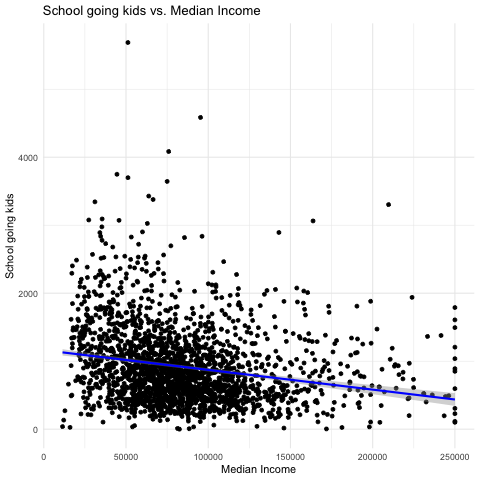

In [74]:
%%R -i df

library(ggplot2)

# Plotting linear regression of population vs med_inc
ggplot(df, aes(x = med_inc, y = school_kids)) +
  geom_point() +  
  geom_smooth(method = 'lm', se = TRUE, color = 'blue') +  
  labs(title = 'School going kids vs. Median Income',
       x = 'Median Income',
       y = 'School going kids') +
  theme_minimal()


In [80]:
%%R
model <- lm(school_kids ~ med_inc, data = df)


summary(model)



Call:
lm(formula = school_kids ~ med_inc, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1091.5  -369.4  -112.4   252.9  4672.9 

Coefficients:


              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.163e+03  2.668e+01   43.58   <2e-16 ***
med_inc     -2.904e-03  2.818e-04  -10.31   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 547.2 on 2204 degrees of freedom
  (126 observations deleted due to missingness)
Multiple R-squared:  0.04599,	Adjusted R-squared:  0.04556 
F-statistic: 106.3 on 1 and 2204 DF,  p-value: < 2.2e-16



Conclusion:

The analysis shows a statistically significant negative relationship between median income (med_inc) and the number of school kids. However, the model's low R-squared value suggests that median income alone does not explain much of the variance in the number of school kids, and other variables not included in the model might play a significant role.

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 126 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 126 rows containing missing values (`geom_point()`). 



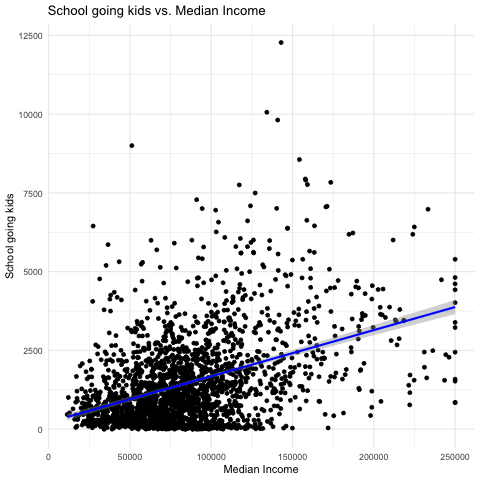

In [78]:
%%R -i df

library(ggplot2)

# Plotting linear regression of population vs med_inc
ggplot(df, aes(x = med_inc, y = white_race)) +
  geom_point() +  
  geom_smooth(method = 'lm', se = TRUE, color = 'blue') +  
  labs(title = 'School going kids vs. Median Income',
       x = 'Median Income',
       y = 'School going kids') +
  theme_minimal()


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 126 rows containing non-finite values (`stat_smooth()`). 

R[write to console]: 2: Removed 126 rows containing missing values (`geom_point()`). 



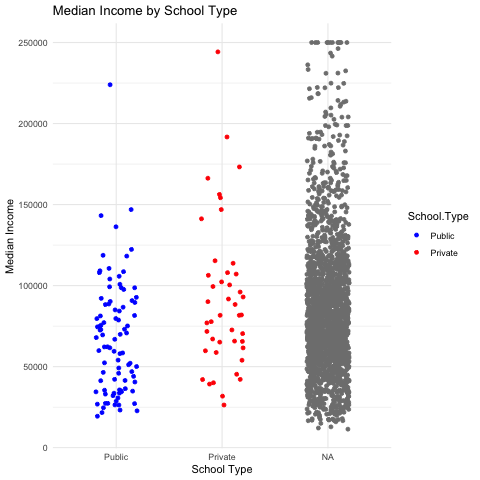

In [82]:
%%R -i df
library(ggplot2)
library(dplyr)


df$School.Type <- factor(df$School.Type, levels = c('Public', 'Private'))


ggplot(data = df, aes(x = School.Type, y = med_inc)) +
  geom_point(aes(color = School.Type), position = position_jitter(width = 0.2, height = 0)) +  # Adds jittered points
  geom_smooth(method = 'lm', aes(fill = School.Type), formula = y ~ x, se = FALSE) +  # Linear regression line
  labs(title = "Median Income by School Type", x = "School Type", y = "Median Income") +
  theme_minimal() +
  scale_fill_manual(values = c("Public" = "blue", "Private" = "red")) +
  scale_color_manual(values = c("Public" = "blue", "Private" = "red"))


In [84]:
%%R

library(dplyr)

# Assuming df is your DataFrame and it's already loaded into R

# Convert School.Type to a factor as it makes more sense for the regression analysis
df$School.Type <- factor(df$School.Type, levels = c('Public', 'Private'))

# Fit a linear model comparing median income across school types
model <- lm(med_inc ~ School.Type, data = df)

# Get a summary of the model to see the coefficients, R-squared, etc.
summary(model)



Call:
lm(formula = med_inc ~ School.Type, data = df)

Residuals:
   Min     1Q Median     3Q    Max 
-66068 -31118  -5583  20646 156132 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)           67820       4086  16.598  < 2e-16 ***
School.TypePrivate    24569       7157   3.433 0.000797 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38980 on 133 degrees of freedom
  (2197 observations deleted due to missingness)
Multiple R-squared:  0.08139,	Adjusted R-squared:  0.07448 
F-statistic: 11.78 on 1 and 133 DF,  p-value: 0.0007966



Conclusion:

The analysis suggests that there is a statistically significant difference in median income associated with the type of school (public vs. private), with private schools being associated with a higher median income. However, the model explains only a small portion of the variance in median income, suggesting that other factors not included in this model also play significant roles.





